# Importing necessary libraries

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import ZeroPadding2D
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import Model
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet50 import preprocess_input

Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Network architecture 

In [4]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

# loading weights

In [5]:
from keras.models import model_from_json
model.load_weights('vgg_face_weights.h5')

# Making model of the network

In [6]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

# function to find the distance between the image required and in database

In [7]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
 
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

# Function for preprocessing of image by giving image path

In [39]:
def preprocess_image(image_path):
    # load image from the directory
    img = load_img(image_path, target_size=(224, 224))
    # convert image to array
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# Function for plotting of two images given for comparison

In [65]:
def plot_on(image_path_x,image_path_y):
    x = plt.imread(image_path_x)
    y = plt.imread(image_path_y)
    plt.subplot(1,2,1)
    plt.imshow(x)
    plt.subplot(1,2,2)
    plt.imshow(y)

# Plotting faces from the image given

In [66]:
def plot_on_finding(image_path_x, name):
    print(name +" is Present")
    x = plt.imread(image_path_x)
    plt.imshow(x)

# Database

In [67]:
database = {}
database["aman"] = vgg_face_descriptor.predict(preprocess_image('./database/11A.jpg'))[0,:]
database["prakhar"] = vgg_face_descriptor.predict(preprocess_image('./database/72A.jpg'))[0,:]
database["pratyush"] = vgg_face_descriptor.predict(preprocess_image('./database/75A.jpg'))[0,:]
database["himanshu"] = vgg_face_descriptor.predict(preprocess_image('./database/38A.jpg'))[0,:]

### Image in the database stored will be

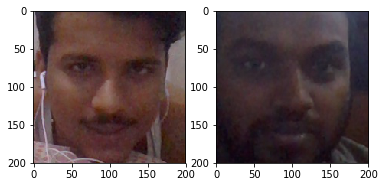

In [70]:
plot_on('./database/11A.jpg','./database/72A.jpg') # here number is the roll no. of student

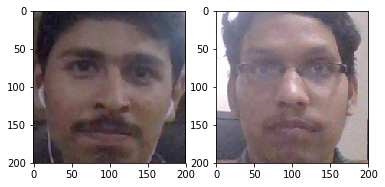

In [69]:
plot_on('./database/75A.jpg','./database/38A.jpg')

# For finding if given roll_no is present in database or not

In [13]:
def who_is_it(img, database):
    img_representation = vgg_face_descriptor.predict(preprocess_image(img))[0,:]
    
    for (name, db_pred) in database.items():
        cosine_similarity = findCosineDistance(img_representation, database[name])
        euclidean_distance = findEuclideanDistance(img_representation, database[name])
        if cosine_similarity<0.20 and euclidean_distance<70:
            print(cosine_similarity, euclidean_distance)
            return name
    return "not in database"

# Checking if the roll_no is present in database or not

Enter roll number of student:75
0.03501236438751221 25.568226
pratyush is Present


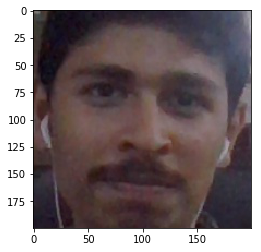

In [71]:
roll_no = int(input("Enter roll number of student:"))
image_path = "./database/"+str(roll_no)+"b.jpg"
name = who_is_it(image_path, database)
if name!="not in database":
    plot_on_finding(image_path, name)
else:
    print(name)

# Using opencv for finding faces in a image

In [72]:
import cv2

In [73]:
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

In [74]:
img = cv2.imread('three.jpg')
faces = face_classifier.detectMultiScale(img, 1.3,5 )

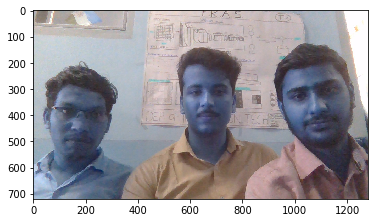

In [75]:
plt.imshow(img)

# Function for finding the image if present in database or not

In [76]:
def who_is_it_n(img, database):
    
    img_representation = vgg_face_descriptor.predict(preprocess_image_n(img))[0,:]
    cosine_similarity_m = 0.35
    eucledian_distance_m = 90
    for (name, db_pred) in database.items():
        cosine_similarity = findCosineDistance(img_representation, database[name])
        euclidean_distance = findEuclideanDistance(img_representation, database[name])
        if cosine_similarity<cosine_similarity_m and euclidean_distance<eucledian_distance_m:
            cosine_similarity_m = cosine_similarity
            euclidean_distance_m = euclidean_distance
            n = name
    
    if cosine_similarity_m<0.35 and euclidean_distance_m<90:
        return n
    else:
        return "not in database"

# Preprocess image by providing image

In [77]:
def preprocess_image_n(image):
    img = img_to_array(image)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# only himanshu and aman is present in the database

if the image is not present in the database or noise is found then the network will simply return "not in database"

> > aman is present 

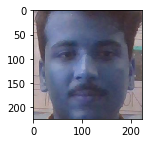

> > not in database 

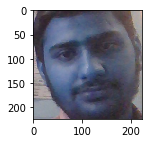

> > himanshu is present 

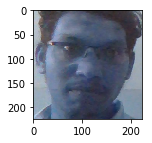

> > not in database 

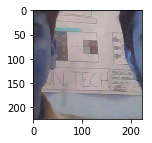

In [78]:
if faces is ():
    print("Not Found")
else:
    count = 1
    for (x, y, w, h)in faces:
        cropped_face = cv2.resize(img[y:y+h, x:x+w],(224,224))
        name = who_is_it_n(cropped_face,database)
        if name == "not in database":
            print("> > "+name, end = " ")
        else:
            print("> > "+name+" is present", end = " ")
        
        plt.figure(figsize = (2,2))
        plt.imshow(cropped_face)
        plt.show()
        count += 1
        
        #cv2.imshow("man",cropped_face)
        #cv2.waitKey()
        #cv2.destroyAllWindows()

# Verify two image if they are of same person or not

In [79]:
def verifyFace(img1, img2):
    
    img1_representation = vgg_face_descriptor.predict(preprocess_image(img1))[0,:]

    img2_representation = vgg_face_descriptor.predict(preprocess_image(img2))[0,:]
 
    cosine_similarity = findCosineDistance(img1_representation, img2_representation)
    euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
    print(cosine_similarity)
    print(euclidean_distance)
    
    if(cosine_similarity <0.20 and euclidean_distance<70):
        return("verified... they are same person")
    else:
        return ("unverified! they are not same person!")


0.3528599143028259
101.62923


unverified! they are not same person!


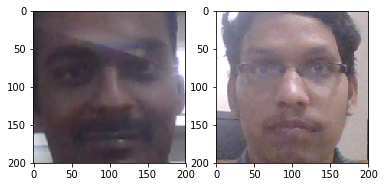

In [80]:
pre = "database/"
a = 20

b = 38

image_path1 = pre+str(a)+"A.jpg"
image_path2 = pre+str(b)+"A.jpg"

plot_on(image_path1, image_path2)

output = verifyFace(image_path1,image_path2)
print("\n")
print(output)